http://dbdesc.com/output_samples/htmlbrowse_northwind.html


# Case Study: Northwind Traders

## get sql db into merged pandas df
ie, aggregate all necessary data into one table/array

##### import packages and modules

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew
import scipy.stats as stats
from math import sqrt

import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy.orm import session, sessionmaker
from sqlalchemy import inspect # so we can perform high level investigations


import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
from matplotlib import style

pd.set_option('display.max_columns', None)

##### create an engine object and a session to connect and work with the Northwind sql db

In [2]:
engine = create_engine("sqlite:///Northwind_small.sqlite", echo = True)
Session = sessionmaker(bind = engine)
session = Session
inspector = inspect(engine)

2019-04-25 12:45:03,833 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-04-25 12:45:03,837 INFO sqlalchemy.engine.base.Engine ()
2019-04-25 12:45:03,838 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-04-25 12:45:03,838 INFO sqlalchemy.engine.base.Engine ()


looking at the table names

In [3]:
print(list(inspector.get_table_names()))
print(len(list(inspector.get_table_names())))

2019-04-25 12:45:03,845 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-04-25 12:45:03,846 INFO sqlalchemy.engine.base.Engine ()
['Category', 'Customer', 'CustomerCustomerDemo', 'CustomerDemographic', 'Employee', 'EmployeeTerritory', 'Order', 'OrderDetail', 'Product', 'Region', 'Shipper', 'Supplier', 'Territory']
13


map the db tables to python objects so we have more versatility and options for tools we can use

In [4]:
from sqlalchemy import MetaData
from sqlalchemy.ext.automap import automap_base # creates a framework that clones the db structure so that it can generate a 
                                                  # a new model in which to map the db with its metadata, ie, column headings

In [5]:
metadata = MetaData()
metadata.reflect(engine)
Base = automap_base(metadata = metadata)
Base.prepare()



Category, Customer, CustomerCustomerDemo, CustomerDemographic, Employee, EmployeeTerritory, Order, OrderDetail,\
Product, Region, Shipper, Supplier, Territory = \
Base.classes.Category,\
Base.classes.Customer,\
Base.classes.CustomerCustomerDemo,\
Base.classes.CustomerDemographic, \
Base.classes.Employee, \
Base.classes.EmployeeTerritory,\
Base.classes.Order,\
Base.classes.OrderDetail, \
Base.classes.Product, \
Base.classes.Region,\
Base.classes.Shipper, \
Base.classes.Supplier, \
Base.classes.Territory

2019-04-25 12:45:03,867 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-04-25 12:45:03,868 INFO sqlalchemy.engine.base.Engine ()
2019-04-25 12:45:03,870 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Category")
2019-04-25 12:45:03,871 INFO sqlalchemy.engine.base.Engine ()
2019-04-25 12:45:03,873 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Category' AND type = 'table'
2019-04-25 12:45:03,874 INFO sqlalchemy.engine.base.Engine ()
2019-04-25 12:45:03,876 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("Category")
2019-04-25 12:45:03,877 INFO sqlalchemy.engine.base.Engine ()
2019-04-25 12:45:03,878 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Category' AND type = 'table'
2019-04-25 12:45:03,878 INFO sqlalchemy.engine.base.Engin

2019-04-25 12:45:03,951 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("EmployeeTerritory")
2019-04-25 12:45:03,952 INFO sqlalchemy.engine.base.Engine ()
2019-04-25 12:45:03,953 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'EmployeeTerritory' AND type = 'table'
2019-04-25 12:45:03,954 INFO sqlalchemy.engine.base.Engine ()
2019-04-25 12:45:03,955 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("EmployeeTerritory")
2019-04-25 12:45:03,956 INFO sqlalchemy.engine.base.Engine ()
2019-04-25 12:45:03,957 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("EmployeeTerritory")
2019-04-25 12:45:03,957 INFO sqlalchemy.engine.base.Engine ()
2019-04-25 12:45:03,958 INFO sqlalchemy.engine.base.Engine PRAGMA index_info("sqlite_autoindex_EmployeeTerritory_1")
2019-04-25 12:45:03,959 INFO sqlalchemy.engine.base.Engine ()
2019-04-25 12:45:03,960 INFO sqlalchemy.engine.base.Engine SELECT sql 

2019-04-25 12:45:04,027 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("Supplier")
2019-04-25 12:45:04,027 INFO sqlalchemy.engine.base.Engine ()
2019-04-25 12:45:04,029 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Supplier' AND type = 'table'
2019-04-25 12:45:04,030 INFO sqlalchemy.engine.base.Engine ()
2019-04-25 12:45:04,031 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("Supplier")
2019-04-25 12:45:04,032 INFO sqlalchemy.engine.base.Engine ()
2019-04-25 12:45:04,033 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'Supplier' AND type = 'table'
2019-04-25 12:45:04,034 INFO sqlalchemy.engine.base.Engine ()
2019-04-25 12:45:04,035 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("Supplier")
2019-04-25 12:45:04,036 INFO sqlalchemy.engine.base.Engine ()
2019-04-25 12:45:04,037 INFO 

converting each table to a pandas dataframe

In [6]:
category_df= pd.read_sql_query("SELECT * FROM [category]", engine)
customer_df = pd.read_sql_query("SELECT * FROM [customer]", engine)
customerCustomerDemo_df = pd.read_sql_query("SELECT * FROM [customerCustomerDemo]", engine)
customerDemographic_df = pd.read_sql_query("SELECT * FROM [customerDemographic]", engine)
employee_df = pd.read_sql_query("SELECT * FROM [employee]", engine)
employeeTerritory_df = pd.read_sql_query("SELECT * FROM [employeeTerritory]", engine)
order_df = pd.read_sql_query("SELECT * FROM [order]", engine)
orderDetail_df = pd.read_sql_query("SELECT * FROM [orderDetail]", engine)
product_df = pd.read_sql_query("SELECT * FROM [product]", engine)
region_df = pd.read_sql_query("SELECT * FROM [region]", engine)
shipper_df = pd.read_sql_query("SELECT * FROM [shipper]", engine)
supplier_df = pd.read_sql_query("SELECT * FROM [supplier]", engine)
territory_df = pd.read_sql_query("SELECT * FROM [territory]", engine)

2019-04-25 12:45:04,080 INFO sqlalchemy.engine.base.Engine SELECT * FROM [category]
2019-04-25 12:45:04,081 INFO sqlalchemy.engine.base.Engine ()
2019-04-25 12:45:04,085 INFO sqlalchemy.engine.base.Engine SELECT * FROM [customer]
2019-04-25 12:45:04,086 INFO sqlalchemy.engine.base.Engine ()
2019-04-25 12:45:04,095 INFO sqlalchemy.engine.base.Engine SELECT * FROM [customerCustomerDemo]
2019-04-25 12:45:04,095 INFO sqlalchemy.engine.base.Engine ()
2019-04-25 12:45:04,099 INFO sqlalchemy.engine.base.Engine SELECT * FROM [customerDemographic]
2019-04-25 12:45:04,100 INFO sqlalchemy.engine.base.Engine ()
2019-04-25 12:45:04,104 INFO sqlalchemy.engine.base.Engine SELECT * FROM [employee]
2019-04-25 12:45:04,105 INFO sqlalchemy.engine.base.Engine ()
2019-04-25 12:45:04,110 INFO sqlalchemy.engine.base.Engine SELECT * FROM [employeeTerritory]
2019-04-25 12:45:04,111 INFO sqlalchemy.engine.base.Engine ()
2019-04-25 12:45:04,114 INFO sqlalchemy.engine.base.Engine SELECT * FROM [order]
2019-04-25 

In [7]:
all_df = list([
category_df,
customer_df ,
customerCustomerDemo_df, 
customerDemographic_df ,
employee_df ,
employeeTerritory_df, 
order_df ,
orderDetail_df, 
product_df ,
region_df ,
shipper_df ,
supplier_df ,
territory_df ])


will join the following tables which will have the info I need for Q. #1<br>
* category
* customer
* order 
* order detail
* product

must amend name for id column on Category table so I can complete a merge statement

In [8]:
category_df.rename(columns = {"Id":"CategoryId"}, inplace = True)

In [9]:
category_df.head()

,CategoryId,CategoryName,Description
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an..."
2,3,Confections,"Desserts, candies, and sweet breads"
3,4,Dairy Products,Cheeses
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal"


In [10]:
cat_prod_df = pd.merge(category_df, product_df, on = "CategoryId" )
cat_prod_df.head()

,CategoryId,CategoryName,Description,Id,ProductName,SupplierId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",1,Chai,1,10 boxes x 20 bags,18.0,39,0,10,0
1,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",2,Chang,1,24 - 12 oz bottles,19.0,17,40,25,0
2,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",24,Guaraná Fantástica,10,12 - 355 ml cans,4.5,20,0,0,1
3,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",34,Sasquatch Ale,16,24 - 12 oz bottles,14.0,111,0,15,0
4,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",35,Steeleye Stout,16,24 - 12 oz bottles,18.0,20,0,15,0


rename Id column on Product Table so I can merge OrderDetail Table

In [11]:
cat_prod_df.rename(columns = {"Id": "ProductId"}, inplace = True)
cat_prod_df.head(2)

,CategoryId,CategoryName,Description,ProductId,ProductName,SupplierId,QuantityPerUnit,UnitPrice,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",1,Chai,1,10 boxes x 20 bags,18.0,39,0,10,0
1,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",2,Chang,1,24 - 12 oz bottles,19.0,17,40,25,0


In [12]:
cat_prod_OrDtl_df = pd.merge(cat_prod_df, orderDetail_df, on = "ProductId")
cat_prod_OrDtl_df.head()

,CategoryId,CategoryName,Description,ProductId,ProductName,SupplierId,QuantityPerUnit,UnitPrice_x,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,Id,OrderId,UnitPrice_y,Quantity,Discount
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",1,Chai,1,10 boxes x 20 bags,18.0,39,0,10,0,10285/1,10285,14.4,45,0.20
1,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",1,Chai,1,10 boxes x 20 bags,18.0,39,0,10,0,10294/1,10294,14.4,18,0.00
2,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",1,Chai,1,10 boxes x 20 bags,18.0,39,0,10,0,10317/1,10317,14.4,20,0.00
3,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",1,Chai,1,10 boxes x 20 bags,18.0,39,0,10,0,10348/1,10348,14.4,15,0.15
4,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",1,Chai,1,10 boxes x 20 bags,18.0,39,0,10,0,10354/1,10354,14.4,12,0.00


In [13]:
order_df.rename(columns = {"Id" : "OrderId"}, inplace = True)

In [14]:
cat_prod_OrDtl_orders_df = pd.merge(cat_prod_OrDtl_df, order_df, on = "OrderId" )
cat_prod_OrDtl_orders_df.head()

,CategoryId,CategoryName,Description,ProductId,ProductName,SupplierId,QuantityPerUnit,UnitPrice_x,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,Id,OrderId,UnitPrice_y,Quantity,Discount,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",1,Chai,1,10 boxes x 20 bags,18.0,39,0,10,0,10285/1,10285,14.4,45,0.2,QUICK,1,2012-08-20,2012-09-17,2012-08-26,2,76.83,QUICK-Stop,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany
1,6,Meat/Poultry,Prepared meats,53,Perth Pasties,24,48 pieces,32.8,0,0,0,1,10285/53,10285,26.2,36,0.2,QUICK,1,2012-08-20,2012-09-17,2012-08-26,2,76.83,QUICK-Stop,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany
2,8,Seafood,Seaweed and fish,40,Boston Crab Meat,19,24 - 4 oz tins,18.4,123,0,30,0,10285/40,10285,14.7,40,0.2,QUICK,1,2012-08-20,2012-09-17,2012-08-26,2,76.83,QUICK-Stop,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany
3,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",1,Chai,1,10 boxes x 20 bags,18.0,39,0,10,0,10294/1,10294,14.4,18,0.0,RATTC,4,2012-08-30,2012-09-27,2012-09-05,2,147.26,Rattlesnake Canyon Grocery,2817 Milton Dr.,Albuquerque,North America,87110,USA
4,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",43,Ipoh Coffee,20,16 - 500 g tins,46.0,17,10,25,0,10294/43,10294,36.8,15,0.0,RATTC,4,2012-08-30,2012-09-27,2012-09-05,2,147.26,Rattlesnake Canyon Grocery,2817 Milton Dr.,Albuquerque,North America,87110,USA


In [15]:
customer_df.rename(columns ={"Id": "CustomerId"}, inplace = True)

In [16]:
data = pd.merge(cat_prod_OrDtl_orders_df, customer_df, on = "CustomerId")
data.head()

,CategoryId,CategoryName,Description,ProductId,ProductName,SupplierId,QuantityPerUnit,UnitPrice_x,UnitsInStock,UnitsOnOrder,ReorderLevel,Discontinued,Id,OrderId,UnitPrice_y,Quantity,Discount,CustomerId,EmployeeId,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry,CompanyName,ContactName,ContactTitle,Address,City,Region,PostalCode,Country,Phone,Fax
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",1,Chai,1,10 boxes x 20 bags,18.0,39,0,10,0,10285/1,10285,14.4,45,0.2,QUICK,1,2012-08-20,2012-09-17,2012-08-26,2,76.83,QUICK-Stop,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,QUICK-Stop,Horst Kloss,Accounting Manager,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,0372-035188,None
1,6,Meat/Poultry,Prepared meats,53,Perth Pasties,24,48 pieces,32.8,0,0,0,1,10285/53,10285,26.2,36,0.2,QUICK,1,2012-08-20,2012-09-17,2012-08-26,2,76.83,QUICK-Stop,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,QUICK-Stop,Horst Kloss,Accounting Manager,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,0372-035188,None
2,8,Seafood,Seaweed and fish,40,Boston Crab Meat,19,24 - 4 oz tins,18.4,123,0,30,0,10285/40,10285,14.7,40,0.2,QUICK,1,2012-08-20,2012-09-17,2012-08-26,2,76.83,QUICK-Stop,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,QUICK-Stop,Horst Kloss,Accounting Manager,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,0372-035188,None
3,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",1,Chai,1,10 boxes x 20 bags,18.0,39,0,10,0,10691/1,10691,18.0,30,0.0,QUICK,2,2013-10-03,2013-11-14,2013-10-22,2,810.05,QUICK-Stop,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,QUICK-Stop,Horst Kloss,Accounting Manager,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,0372-035188,None
4,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",43,Ipoh Coffee,20,16 - 500 g tins,46.0,17,10,25,0,10691/43,10691,46.0,40,0.0,QUICK,2,2013-10-03,2013-11-14,2013-10-22,2,810.05,QUICK-Stop,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,QUICK-Stop,Horst Kloss,Accounting Manager,Taucherstraße 10,Cunewalde,Western Europe,01307,Germany,0372-035188,None


## EDA

In [17]:
import copy
q1_data = copy.deepcopy(data[["CategoryName", "Quantity", "Discount"]])
q1_data.head()
# CategoryName, Quantity, Discount, 

,CategoryName,Quantity,Discount
0,Beverages,45,0.2
1,Meat/Poultry,36,0.2
2,Seafood,40,0.2
3,Beverages,30,0.0
4,Beverages,40,0.0


In [18]:
q1_data.describe()

,Quantity,Discount
count,2078.000000,2078.000000
mean,23.924447,0.056035
std,19.151339,0.083421
min,1.000000,0.000000
25%,10.000000,0.000000
50%,20.000000,0.000000
75%,30.000000,0.100000
max,130.000000,0.250000


In [19]:
q1_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2078 entries, 0 to 2077
Data columns (total 3 columns):
CategoryName    2078 non-null object
Quantity        2078 non-null int64
Discount        2078 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 64.9+ KB


In [20]:
q1_data["CategoryName"] = q1_data["CategoryName"].astype("category") 

In [21]:
q1_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2078 entries, 0 to 2077
Data columns (total 3 columns):
CategoryName    2078 non-null category
Quantity        2078 non-null int64
Discount        2078 non-null float64
dtypes: category(1), float64(1), int64(1)
memory usage: 51.1 KB


In [22]:
q1_data.head()

,CategoryName,Quantity,Discount
0,Beverages,45,0.2
1,Meat/Poultry,36,0.2
2,Seafood,40,0.2
3,Beverages,30,0.0
4,Beverages,40,0.0


In [23]:
q1_data.isna().sum()

CategoryName    0
Quantity        0
Discount        0
dtype: int64

In [24]:
q1_data["CategoryName"] = q1_data.CategoryName.cat.codes

In [25]:
q1_data_v2 = q1_data.copy()

In [26]:
q1_data_v2.head()

,CategoryName,Quantity,Discount
0,0,45,0.2
1,5,36,0.2
2,7,40,0.2
3,0,30,0.0
4,0,40,0.0


In [30]:
catNameDummy = pd.get_dummies(q1_data_v2, columns = ["CategoryName"])

In [31]:
catNameDummy.head()

,Quantity,Discount,CategoryName_0,CategoryName_1,CategoryName_2,CategoryName_3,CategoryName_4,CategoryName_5,CategoryName_6,CategoryName_7
0,45,0.2,1,0,0,0,0,0,0,0
1,36,0.2,0,0,0,0,0,1,0,0
2,40,0.2,0,0,0,0,0,0,0,1
3,30,0.0,1,0,0,0,0,0,0,0
4,40,0.0,1,0,0,0,0,0,0,0


In [32]:
q1_data_v3 = catNameDummy.copy()

### check for normality

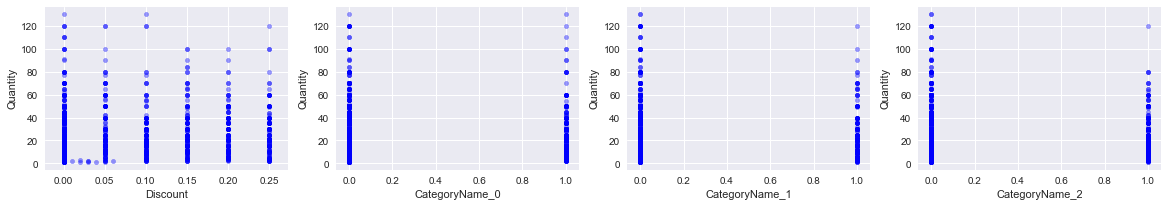

In [35]:
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (20,3))

for xcol, ax in zip(['Discount', 'CategoryName_0', 'CategoryName_1', 'CategoryName_2', 'CategoryName_3',
                    'CategoryName_4', 'CategoryName_5', 'CategoryName_6', 'CategoryName_7'], axes):
    q1_data_v3.plot(kind = 'scatter', x=xcol, y='Quantity', ax=ax, alpha=0.4, color='b')
    

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(20,3))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition','grade',
                    'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 
                    'sqft_lot15'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [37]:
q1_data_v3.Discount.unique()

array([0.2 , 0.  , 0.25, 0.1 , 0.05, 0.15, 0.02, 0.03, 0.04, 0.06, 0.01])

##  Question 1

    *  Do discounts have a statistically significant effect on the number of products customers order?
    *  if so, at what level(s) of discount?

h0 = customer orders with discounts are equal to customer orders without discounts<br>
h1 = customer orders with discounts are greater than customer orders without discounts<br>
this is a one tailed test

whats the average...are orders with discounts greater than the average?